In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTENC

import warnings
warnings.filterwarnings('ignore')

# Sets a random seed to ensure reproducible results

In [13]:
seed_value= 0

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# for later versions: 
# tf.compat.v1.set_random_seed(seed_value)

# 5. Configure a new global `tensorflow` session
"""
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)"
"""

'\nfrom keras import backend as K\nsession_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)\nsess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)\ntf.compat.v1.keras.backend.set_session(sess)"\n'

In [14]:
X_train = pd.read_csv("X_train_final.csv")
y_train = pd.read_csv("y_train_final.csv")
X_test = pd.read_csv("X_test_final.csv")
y_test = pd.read_csv("y_test_final.csv")
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_train

(572, 57)
(106, 57)
(572, 1)
(106, 1)


,Age (yrs),BMI,Pulse rate(bpm),Menstrual Cycle Length(days),Marriage Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH/LH,...,Vit D3 (ng/mL)_high,Vit D3 (ng/mL)_low,Vit D3 (ng/mL)_normal,PRG(ng/mL)_low,RBS(mg/dl)_high,RBS(mg/dl)_normal,I beta-HCG cat_abnormal,I beta-HCG cat_normal,II beta-HCG cat_abnormal,II beta-HCG cat_normal
0,1.212838,1.138042,1.784158,-1.974369,1.714235,1,1.032154,-0.155302,-0.062256,-0.052340,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,1.212838,-0.738207,-0.519094,0.007810,1.303924,0,-0.413545,-0.194309,-0.147713,-0.059495,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.670140,-0.713840,-0.519094,0.668536,1.098769,1,-0.413545,0.542465,0.300274,-0.095708,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,-0.415256,-1.152443,2.551909,0.007810,-1.157939,1,-0.413545,2.727182,-0.076965,-0.067672,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.031939,1.138042,2.551909,0.007810,1.303924,0,-0.413545,-0.194309,-0.147713,-0.072053,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,-1.191281,0.794340,1.784158,0.007810,-0.835833,1,-0.413545,-0.194309,-0.147713,0.020348,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
568,-1.558498,0.054061,0.248657,-1.845955,-0.853103,0,-0.413545,-0.194309,-0.147713,-0.060024,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
569,-0.665800,-0.164731,2.375315,-1.211244,-0.542473,0,-0.413545,-0.143145,-0.035624,-0.096597,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
570,0.319137,2.212497,1.784158,1.329262,-0.323034,1,-0.413545,-0.058615,-0.137401,-0.043433,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


## Logistic Regression

In [15]:
# define model with balanced class weights
model = LogisticRegression(class_weight='balanced', max_iter=1000)

In [16]:
# perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracy_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
cv_roc_auc_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc')

In [17]:
print(f"Cross-Validation Accuracy Scores: {cv_accuracy_scores}")
print(f"Mean Accuracy: {cv_accuracy_scores.mean():.4f}")

print(f"Cross-Validation AUC-ROC Scores: {cv_roc_auc_scores}")
print(f"Mean AUC-ROC: {cv_roc_auc_scores.mean():.4f}")

Cross-Validation Accuracy Scores: [0.91304348 0.93913043 0.85087719 0.96491228 0.89473684]
Mean Accuracy: 0.9125
Cross-Validation AUC-ROC Scores: [0.96676923 0.98204504 0.91820988 0.98765432 0.96944444]
Mean AUC-ROC: 0.9648


In [18]:
model.fit(X_train,y_train)

print("The intercept b0= ", model.intercept_)
print("The coefficient b1= ", model.coef_)

# predict test set
y_pred= model.predict(X_test)

The intercept b0=  [-1.05337136]
The coefficient b1=  [[-0.24377983  0.12943358  0.39395179 -0.19321208 -0.52777909 -0.61253938
  -0.21511093 -0.39754422  0.58278596 -0.06725487 -0.19062056  0.98354591
   0.89593058  0.95546147  0.16796796  0.47781173  0.98621791  0.26062118
   0.34797835  1.83429485  0.312363   -0.02709123  0.20967062  0.69722251
  -0.14052129 -0.33566945 -0.84468932 -0.58732635 -0.47236841  0.23760627
  -0.55226704 -0.31351091 -0.39542879  0.38184056  0.08752071 -0.10110894
   0.59840252 -0.61199075  0.27239923 -0.32704356  0.04105609 -0.28238184
   0.78197049 -0.52140652 -0.66189556 -0.56119447 -1.34194545 -0.54618109
  -0.28071245 -0.53687237  0.90890411  0.6202413  -0.63268512  0.25124617
  -0.2648344  -0.17915407  0.16556584]]


[[62 10]
 [ 4 30]]


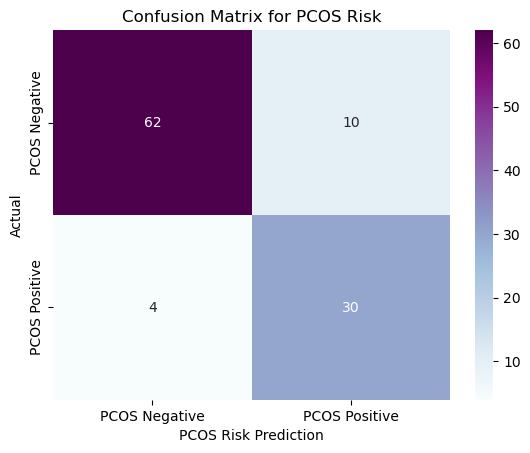

In [19]:
# confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred)
print(ConfusionMatrix)

ax = sns.heatmap(ConfusionMatrix, annot=True, cmap='BuPu')
ax.set_title('Confusion Matrix for PCOS Risk');
ax.set_xlabel('PCOS Risk Prediction')
ax.set_ylabel('Actual');
ax.xaxis.set_ticklabels(['PCOS Negative','PCOS Positive'])
ax.yaxis.set_ticklabels(['PCOS Negative','PCOS Positive'])
plt.show()

## Hyperparameter Tuning with GridSearchCV
- finding best parameters for best roc-auc score

In [20]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # regularization strength
    'penalty': ['l1', 'l2'],  # regularization type
    'solver': ['liblinear']  # needed for L1 regularization
}

grid_search = GridSearchCV(LogisticRegression(class_weight='balanced', max_iter=1000), param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Grid-Search ROC-AUC score: {grid_search.best_score_:.4f}")

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Grid-Search ROC-AUC score: 0.9706


In [21]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]  # probability scores for ROC-AUC

In [22]:
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test ROC-AUC Score: {auc:.4f}")
print(f"Test Recall Score: {recall:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.8491
Test ROC-AUC Score: 0.9265
Test Recall Score: 0.8824

Confusion Matrix:
 [[60 12]
 [ 4 30]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.83      0.88        72
           1       0.71      0.88      0.79        34

    accuracy                           0.85       106
   macro avg       0.83      0.86      0.84       106
weighted avg       0.87      0.85      0.85       106

